In [1]:
!pip install imutils

  Running setup.py bdist_wheel for imutils ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/16/84/1f/bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd
Successfully built imutils
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install scikit-image

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [28]:
import skimage.io as io

### Find IOU

In [29]:
def findIOU(label_img, pred_img):
    intersection = np.logical_and(label_img, pred_img)
    union = np.logical_or(label_img, pred_img)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

### Set Image to find IOU Score

In [51]:
image_no = 1

In [52]:
# pred_cc_path = f'/home/ec2-user/SageMaker/notebooks/bfp-related-nb/test_rotate_pred_cc/img_{image_no}_270_deg_cc.png'
# pred_path = f'/home/ec2-user/SageMaker/notebooks/bfp-related-nb/test_rotate_pred/img_{image_no}_270_deg_pred.png'

pred_cc_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/rn50-cc-analysis/image_{image_no}_pred_cc_binary.tif'
label_cc_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/for-cc-analysis/lbl-cc-analysis/image_{image_no}_gt_cc.tif'

# pred_cc_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/verification-run/rn34-cc/image_{image_no}_cc.png'
# pred_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/resnet-34-out/image_{image_no}_pred_binary.png'


label_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/label-626-gt/image_{image_no}_gt.tif'
pred_path = f'/home/ec2-user/SageMaker/data/footprint/mohan-func-test-run-data/run-1/resnet-50-out/image_{image_no}_pred_binary.png'

In [53]:
label_original_img = cv.imread(label_path)
label_original_img.shape

(512, 512, 3)

### Original, Center Cut - Label Image

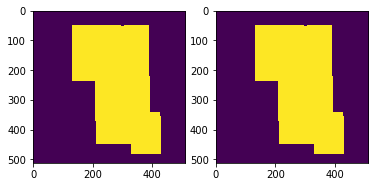

In [54]:

# lbl_cc_img = io.imread(label_cc_path)
lbl_cc_img = cv.imread(label_cc_path, cv.IMREAD_GRAYSCALE)
label_original_img = cv.imread(label_path, cv.IMREAD_GRAYSCALE)

fig = plt.figure()
img1 = fig.add_subplot(1,2,1)
img1.imshow(label_original_img)

img2 = fig.add_subplot(1,2,2)
img2.imshow(lbl_cc_img)


### Original and Center cut - Prediction Image 

TypeError: Image data cannot be converted to float

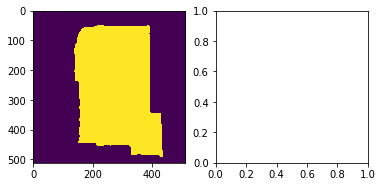

In [55]:
pred_cc_img = cv.imread(pred_cc_path, cv.IMREAD_GRAYSCALE)
pred_original_img = cv.imread(pred_path, cv.IMREAD_GRAYSCALE)

fig = plt.figure()
img3 = fig.add_subplot(1,2,1)
# plt.imshow(pred_original_img)
# plt.show()
img3.imshow(pred_original_img) 

img4 = fig.add_subplot(1,2,2)
img4.imshow(pred_cc_img)
# plt.imshow(pred_cc_img)
# plt.show()

# print(pred_bw_img.shape, np.unique(pred_bw_img))
# plt.imshow(pred_bw_img)

### Find IOU score

In [38]:
print(findIOU(lbl_cc_img, pred_cc_img))

0.0


### compare LABEL and PRED images

In [ ]:
np.array_equal(pred_bw_img, lbl_bw_img)